In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import yfinance as yf
import tensorflow
import keras

In [2]:
amzn = yf.download('AMZN', start='2019-12-01', end='2020-11-17', progress=False)

In [3]:
amzn.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-02,1804.400024,1805.550049,1762.680054,1781.599976,1781.599976,3925600
2019-12-03,1760.000000,1772.869995,1747.229980,1769.959961,1769.959961,3380900
2019-12-04,1774.010010,1789.089966,1760.219971,1760.689941,1760.689941,2670100


In [4]:
amzn = amzn.drop(columns=['Adj Close'])

In [5]:
amzn.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-02,1804.400024,1805.550049,1762.680054,1781.599976,3925600
2019-12-03,1760.000000,1772.869995,1747.229980,1769.959961,3380900
2019-12-04,1774.010010,1789.089966,1760.219971,1760.689941,2670100


In [6]:
amzn.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [7]:
amzn.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2019-12-02 to 2020-11-16
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    243 non-null    float64
 1   High    243 non-null    float64
 2   Low     243 non-null    float64
 3   Close   243 non-null    float64
 4   Volume  243 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.4 KB


In [8]:
amzn.to_csv('amzn_export.csv')

Text(0, 0.5, 'Historic Prices')

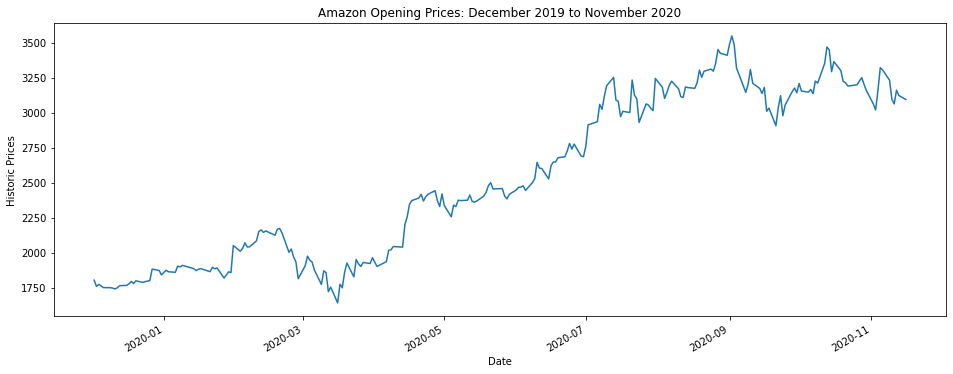

In [9]:
amzn['Open'].plot(figsize=(16,6))
plt.title('Amazon Opening Prices: December 2019 to November 2020')
plt.xlabel('Date')
plt.ylabel('Historic Prices')

In [10]:
amzn.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-02,NaN,NaN,NaN,NaN,NaN
2019-12-03,NaN,NaN,NaN,NaN,NaN
2019-12-04,NaN,NaN,NaN,NaN,NaN
2019-12-05,NaN,NaN,NaN,NaN,NaN
2019-12-06,NaN,NaN,NaN,NaN,NaN
2019-12-09,NaN,NaN,NaN,NaN,NaN
2019-12-10,1764.452863,1771.852870,1747.267142,1756.149972,2.982129e+06
2019-12-11,1755.491438,1763.917149,1743.414272,1751.452829,2.720986e+06
2019-12-12,1754.062866,1762.650007,1743.158552,1750.077114,2.680271e+06


Text(0, 0.5, 'Historic Price')

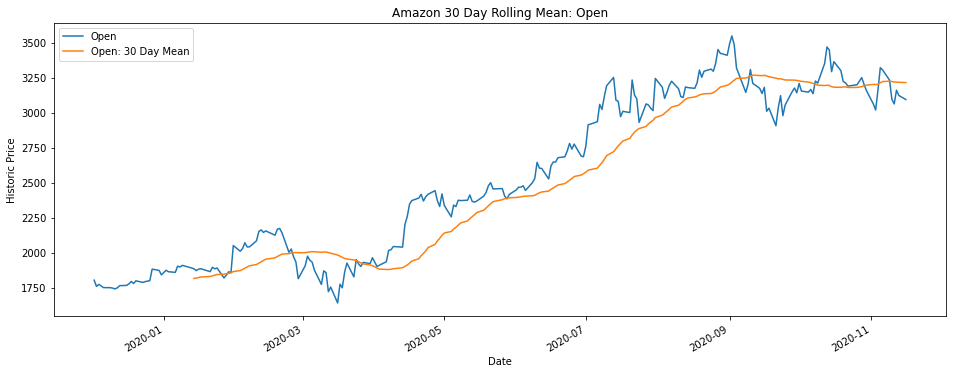

In [11]:
amzn['Open: 30 Day Mean'] = amzn['Open'].rolling(window=30).mean()
amzn[['Open','Open: 30 Day Mean']].plot(figsize=(16,6))
plt.title('Amazon 30 Day Rolling Mean: Open')
plt.ylabel('Historic Price')

Text(0, 0.5, 'Historic Price')

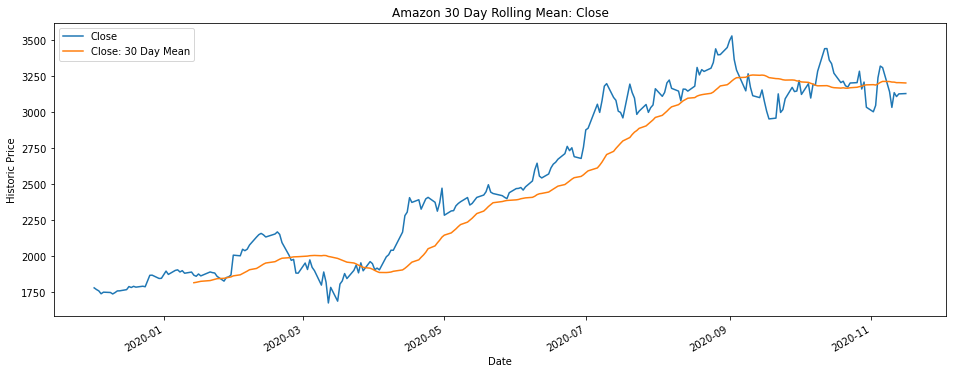

In [12]:
amzn['Close: 30 Day Mean'] = amzn['Close'].rolling(window=30).mean()
amzn[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))
plt.title('Amazon 30 Day Rolling Mean: Close')
plt.ylabel('Historic Price')

In [13]:
amzn_training_set = amzn['Close']
amzn_training_set = pd.DataFrame(amzn_training_set)

In [14]:
from sklearn.preprocessing import MinMaxScaler
amzn_scale = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = amzn_scale.fit_transform(amzn_training_set)

In [15]:
X_train = []
y_train = []
for i in range(30, 223):
    X_train.append(training_set_scaled[i-30:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [17]:
regressor = Sequential()

In [18]:
# Adding the first LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [181]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 250, batch_size = 96)

Epoch 1/250
3/3 [==============================] - 0s 73ms/step - loss: 0.0021
Epoch 2/250
3/3 [==============================] - 0s 75ms/step - loss: 0.0024
Epoch 3/250
3/3 [==============================] - 0s 63ms/step - loss: 0.0020
Epoch 4/250
3/3 [==============================] - 0s 71ms/step - loss: 0.0016
Epoch 5/250
3/3 [==============================] - 0s 63ms/step - loss: 0.0023
Epoch 6/250
3/3 [==============================] - 0s 67ms/step - loss: 0.0023
Epoch 7/250
3/3 [==============================] - 0s 69ms/step - loss: 0.0021
Epoch 8/250
3/3 [==============================] - 0s 64ms/step - loss: 0.0021
Epoch 9/250
3/3 [==============================] - 0s 67ms/step - loss: 0.0023
Epoch 10/250
3/3 [==============================] - 0s 63ms/step - loss: 0.0021
Epoch 11/250
3/3 [==============================] - 0s 70ms/step - loss: 0.0020
Epoch 12/250
3/3 [==============================] - 0s 64ms/step - loss: 0.0019
Epoch 13/250
3/3 [==============================]

In [182]:
amzn_test = pd.read_csv('amzn_test.csv', index_col = 'Date', parse_dates=True)

In [183]:
amzn_test.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2020-10-19,3299.610107,3329.000000,3192.73999,3207.209961,5223600
2020-10-20,3222.280029,3266.000000,3192.01001,3217.010010,4509700
2020-10-21,3212.500000,3233.879883,3160.00000,3184.939941,4592700


In [184]:
real_prc_amzn = amzn_test.iloc[:, 1:2].values

In [185]:
amzn_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2020-10-19 to 2020-11-16
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    21 non-null     float64
 1   High    21 non-null     float64
 2   Low     21 non-null     float64
 3   Close   21 non-null     float64
 4   Volume  21 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 1008.0 bytes


In [186]:
amzn_test['Volume'] = amzn_test['Volume'].astype(float)

In [187]:
amzn_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2020-10-19 to 2020-11-16
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    21 non-null     float64
 1   High    21 non-null     float64
 2   Low     21 non-null     float64
 3   Close   21 non-null     float64
 4   Volume  21 non-null     float64
dtypes: float64(5)
memory usage: 1008.0 bytes


In [188]:
test_set=amzn_test['Open']
test_set=pd.DataFrame(test_set)

In [189]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2020-10-19 to 2020-11-16
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    21 non-null     float64
dtypes: float64(1)
memory usage: 336.0 bytes


In [190]:
amzn_total = pd.concat((amzn['Open'], amzn_test['Open']), axis = 0)
inputs = amzn_total[len(amzn_total) - len(amzn_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = amzn_scale.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = amzn_scale.inverse_transform(predicted_stock_price)

In [191]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


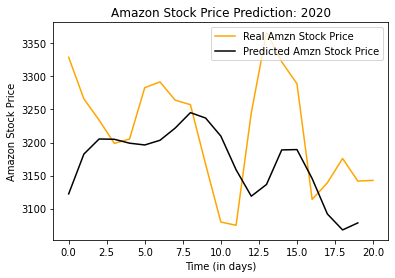

In [197]:
plt.plot(real_prc_amzn, color = 'orange', label = 'Real Amzn Stock Price')
plt.plot(predicted_stock_price, color = 'black', label = 'Predicted Amzn Stock Price')
plt.title('Amazon Stock Price Prediction: 2020')
plt.xlabel('Time (in days)')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()